# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Different tree algorithms

ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

# Splitting the tree

The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. It favours mostly the larger partitions and are very simple to implement. In simple terms, it calculates the probability of a certain randomly selected feature that was classified incorrectly.

The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.

The Gini Index works on categorical variables and gives the results in terms of “success” or “failure” and hence performs only binary split. It isn’t computationally intensive


An alternative to the Gini Index is the Information Entropy which used to determine which attribute gives us the maximum information about a class. It is based on the concept of entropy, which is the degree of impurity or uncertainty. It aims to decrease the level of entropy from the root nodes to the leaf nodes of the decision tree. 

## Advantages

- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

## Problems

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## Practical tips 

- Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

- Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

- Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

- Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

- Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

- If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

- If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

# Introduction

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import graphviz

# install graphviz on Windows using `winget install graphviz`
# install graphviz on Ubuntu using `sudo apt install graphviz`
# install graphviz on Mac using `brew install graphviz`
# make sure the to set up your PATH to point at the newly installed binaries

# Decision Tree Classifier

In [30]:
# Let us create a synthetic dataset with 300 points
# the points belong to two classes (Boolean)
# the classes are arranged in an 'XOR' pattern
# https://en.wikipedia.org/wiki/Exclusive_or

x = [[np.random.randn(), np.random.randn()] for i in range(1, 300)]
y = [[(a > 0) & (b > 0) | (a < 0) & (b < 0)] for (a, b) in x]

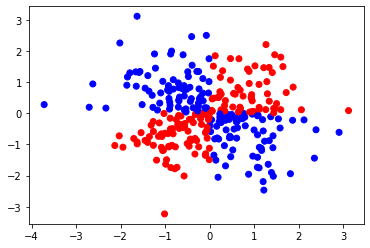

In [31]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr')

# notice that it's not possible to separate the classes using
# a single straight line (specifically a 2D hyperplane)
# https://en.wikipedia.org/wiki/Hyperplane

In [32]:
# we use models provided by sklearn.
# let us begin by artificially limiting the shape of the tree
# we say it can only have a depth of 1
# read more about the parameters at
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# because we're working on a classification problem
# we choose to calculate the error using classification accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mc = DecisionTreeClassifier(max_depth=1) 
mc.fit(x, y)

accuracy_score(y, mc.predict(x))

# as expected this gives us a very low score

0.5785953177257525

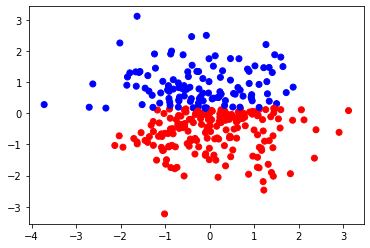

In [33]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=mc.predict(x), cmap='bwr')

# we see that this shallow tree is not able to successfully separate the classes

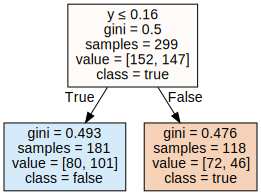

In [34]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(mc, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

# this is what the tree of depth 1 looks like
# notice that by default the tree generator uses gini impurity to create splits

In [35]:
m2c = DecisionTreeClassifier(max_depth=2) 
m2c.fit(x, y)

ŷ = m2c.predict(x)

accuracy_score(y, ŷ)

# by increasing the depth we improve the score significantly
# for this particular problem only a depth of 2 is strictly required
# depending on how the data and trees are generated, the score can be very high on the first try

0.903010033444816

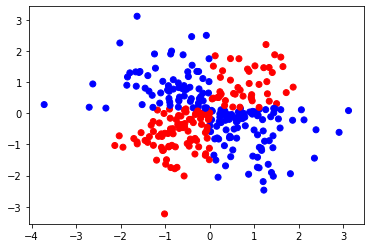

In [36]:
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=ŷ, cmap='bwr')

# sometimes the data lends itself well to a perfect classifier
# try regenerating the data and re-running this test
# to see how results differ each run

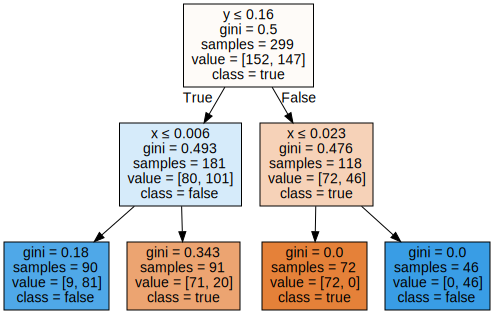

In [37]:
features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(m2c, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

# the tree structure of this model is one layer deeper than the first one we built
# note how the gini complexity is very low on the leaves
# compared to the second layer.

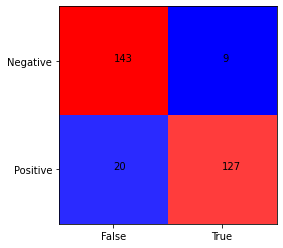

In [38]:
# we can visualize the accuracy of the model using a confusion matrix

acc = confusion_matrix(y, ŷ)

plt.close('all')

fig, ax = plt.subplots()
ax.imshow(acc, cmap='bwr')
ax.xaxis.set(ticks=(0, 1), ticklabels=('False', 'True'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Negative', 'Positive'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, acc[i][j], color='black')
plt.show()

# note that we have low false positives and true negatives

In [39]:
# if we want to improve the performance of the tree
# without trying all the parameters by hand, there are two viable approaches
# grid search tries parameters exhaustively and is precise but slow
# random search tries parameters randomly and is less precise but much faster

from sklearn.model_selection import GridSearchCV

param = {'criterion':('gini', 'entropy'), 
         'splitter':('best', 'random'), 
         'max_depth' : [1,2,3,4,5,10], 
         'min_samples_leaf' : [1, 2,3,4, 5, 10, 100 ]}

m = DecisionTreeClassifier() 
tree = GridSearchCV(m, param)

In [40]:
tree.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 100],
                         'splitter': ('best', 'random')})

In [41]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [42]:
# we see that by increasing the depth a bit 
# and regularizing the number of samples required per leaf we can achieve an almost perfect score

ŷ = tree.predict(x)

accuracy_score(y, ŷ)

0.9966555183946488

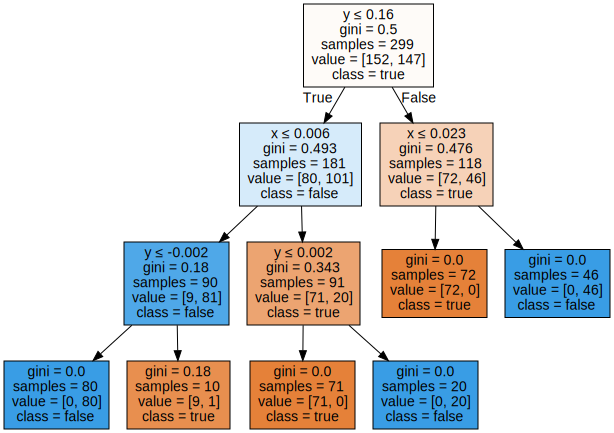

In [43]:
# the resulting tree is more complex
# for this particular dataset it will likely perform well
# but when trees become this specialized they risk not
# generalizing to newly produced data points

features = ["x", "y"]
target = ["true", "false"]

dat = export_graphviz(tree.best_estimator_, filled=True, special_characters=True, feature_names=features, class_names=target)

graph = graphviz.Source(dat)
graph

## Decision Tree Regressor

In Decision Trees for Classification, we saw how the tree asks right questions at the right node in order to give accurate and efficient classifications. The way this is done in Classification Trees is by using 2 measures , namely Entropy and Information Gain. 

But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. We need a different measure now. A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of mean square error.

In the Regression Tree algorithm, we do the same thing as the Classification trees. But, we try to reduce the Mean Square Error at each child rather than the entropy.

The basic idea behind the algorithm is to find the point in the independent variable to split the data-set into 2 parts, so that the mean squared error is the minimised at that point. The algorithm does this in a repetitive fashion and forms a tree-like structure.

In [45]:
# we create a sin wave of Gaussian normal perturbed points
# the wave is more complex than a low-rank polynomial
# let us see if trees can work with this data

x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'target')

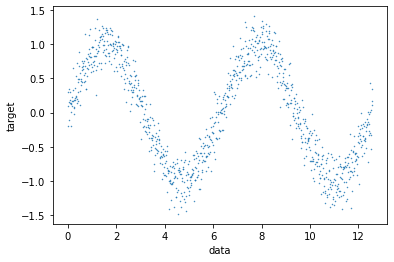

In [46]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")

In [47]:
# because we're working with regression we choose to measure the error
# using mean squared error

# again we artificially restrict the tree depth to exemplify the effect
# on modelling a highly nonlinear system

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

m2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2.fit(x, y)
ŷ = m2.predict(x)

mean_squared_error(y, ŷ)

# before even visualizing the result we see that the score is not great
# this model does not approximate the data set very well

0.32098677588243146

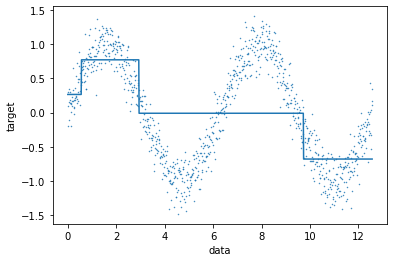

In [48]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, ŷ)

# There is a nice analogy to be made here in the aliasing of a signal processor
# that has passed the the Nyquist limit
# https://en.wikipedia.org/wiki/Nyquist_frequency
# As you can see, the shallow depth of the tree is not able to provide enough
# parameters to model the numerous curves of the objective function domain

# because trees do not share parameters across branches
# they require both more training data, and more parameters,
# to create a model of equal expressivity as, say, a fully-connected neural network

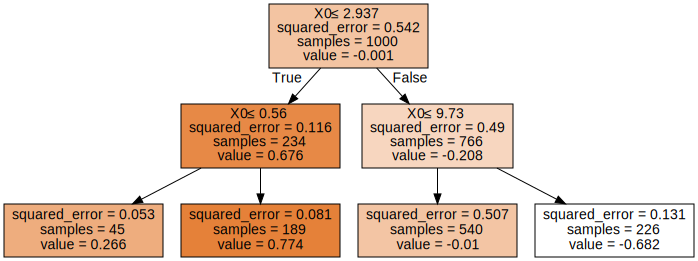

In [49]:
dat = export_graphviz(m2, filled=True, special_characters=True)
graph = graphviz.Source(dat)
graph

# although we are performing regression, the tree structure is nearly identical

In [50]:
# by increasing the depth to 5 layers the model begins to perform very well

m5 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5.fit(x, y)

mean_squared_error(y, m5.predict(x))

0.04971261642674999

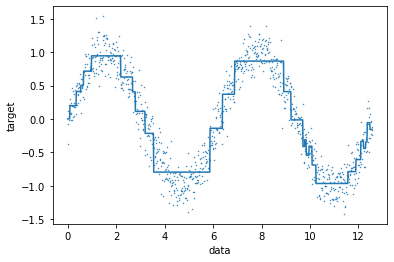

In [21]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, m5.predict(x))

# the resulting plot shows us how vell the model is able to approximate the data
# visually speaking, it would seem the model "understands" the data
# provided that the model is asked to interpolate to new data
# it should perform fairly well

# Working with real data

In [52]:
# this is a fairly simple, but real dataset
# we will apply the exact same methods here as we did above

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [53]:
# The first step is to split our dataset in such a way
# that we can test the model on data that it hasn't been trained on.
# This will give us an indication if it will perform well on new data we provide it with.

# If we wish to be even more rigorous, we could split the data 3 ways
# with one training set, one test set, and one final validation set
# which we would only allow ourselves to use on a very limited basis
# to prevent ourselves from over-tuning the model.

x, xt, y, yt = train_test_split(pd.DataFrame(housing.data), pd.DataFrame(housing.target), test_size = 0.2)
x

# This particular dataset has 7 scalar values per sample
# It is a 7-dimensional vector describing properties of a house
# note that the values are not normalized
# values can differ by three orders of magnitude

,0,1,2,3,4,5,6,7
18451,6.4664,17.0,6.860947,0.958580,1076.0,3.183432,37.23,-121.81
10718,4.1103,8.0,5.385965,1.067669,950.0,2.380952,33.65,-117.83
9884,3.4239,12.0,4.518648,1.065268,2274.0,2.650350,36.69,-121.80
17483,6.7247,24.0,6.803030,1.009470,1683.0,3.187500,34.45,-119.82
10787,3.1305,25.0,4.310078,1.124031,985.0,1.908915,33.64,-117.92
...,...,...,...,...,...,...,...,...
18661,2.5172,31.0,4.895775,1.188732,746.0,2.101408,36.97,-121.94
16578,3.0865,52.0,4.893855,0.949721,426.0,2.379888,37.74,-121.43
11524,5.2589,17.0,4.618227,1.162562,900.0,2.216749,33.72,-118.05
2260,1.3385,24.0,4.194049,1.028461,2764.0,3.575679,36.78,-119.84


In [54]:
# the target we wish to train on is a single scalar value representing the price of a house

y

,0
18451,2.783
10718,2.504
9884,1.948
17483,3.338
10787,2.688
...,...
18661,3.308
16578,1.198
11524,2.261
2260,0.588


In [55]:
# a tree of depth 2 performs very poorly

m2r = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5) 
m2r.fit(x, y)

mean_squared_error(y, m2r.predict(x))

0.7293850038181421

In [56]:
# a tree of depth 5 is almost twice as good

m5r = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5) 
m5r.fit(x, y)

mean_squared_error(y, m5r.predict(x))

0.48731358699324745

In [57]:
# a tree of depth 20 is almost 4 times as good

m20r = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
m20r.fit(x, y)

mean_squared_error(y, m20r.predict(x))

0.11790300559567403

In [59]:
# but there is an upper limit, and that is a function of the "intrinsic dimensionality"
# read more about this here: https://openreview.net/pdf?id=XJk19XzGq2J

# a tree of deth 150 does not perform better than one of depth 20 on this dataset

mr200 = DecisionTreeRegressor(max_depth=150, min_samples_leaf=5) 
mr200.fit(x, y)

mean_squared_error(y, mr200.predict(x))

0.11752812450949154

In [60]:
# let us extract the features of this particular tree

fi = m20r.tree_.compute_feature_importances(normalize=False)

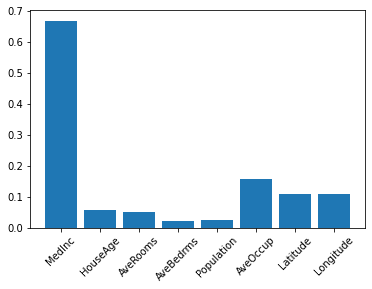

In [61]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(housing.feature_names, fi)
plt.xticks(rotation=45)
plt.show()

# we see that the feature which predicts house price the best is median income of people in that area

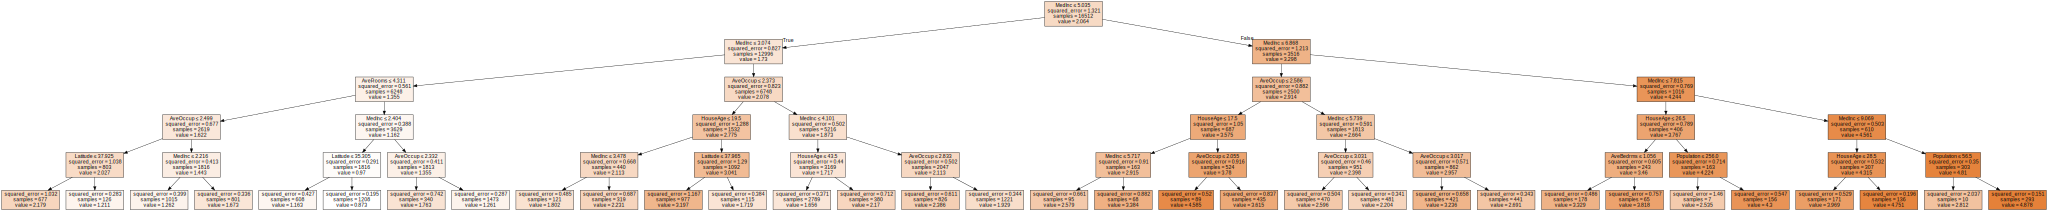

In [62]:
dat = export_graphviz(m5r, filled=True, 
                           special_characters=True,
                           feature_names=housing.feature_names)
graph = graphviz.Source(dat)
graph

# note how large the tree has become
# however, the complexity of this model pales in comparison to ensemble methods
# or even neural networks with trillions of parameters

# Limitations - Complexity

In [63]:
# let us create a dataset that is about as complex as it gets in 2 dimensions

v = np.linspace(0, 4 * 3.14159, 1000)
xpos = np.sin(v) * v + np.random.randn(1000)
ypos = np.cos(v) * v + np.random.randn(1000)
x1 = [[x, y] for (x, y) in zip(xpos, ypos)]
xpos = -np.sin(v) * v + np.random.randn(1000)
ypos = -np.cos(v) * v + np.random.randn(1000)
x2 = [[x, y] for (x, y) in zip(xpos, ypos)]


x = np.array(x1+x2)
x

y = np.array([True for i in range(1000)] + [False for i in range(1000)])
y = y.reshape(-1, 1)

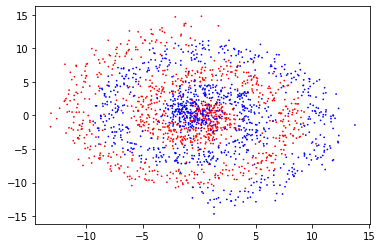

In [64]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

In [34]:
# a small tree has no chance on a dataset like this

ms = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.606

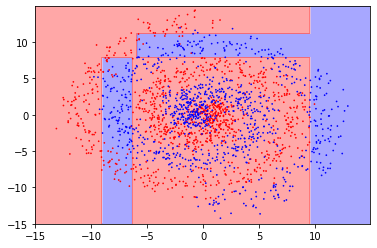

In [35]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

# note  in particular how the decision boundaries of the tree
# are linear maps, meaning it will require very many parameters
# to describe this data

In [36]:
# let us make a very deep tree

ms = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5) 
ms.fit(x, y)
ŷ = ms.predict(x)

accuracy_score(y, ŷ)

0.9025

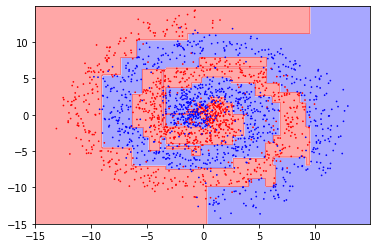

In [37]:
# Plotting decision regions
xx, yy = np.meshgrid(np.arange(-15, 15, 0.1), np.arange(-15, 15, 0.1))
Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
plt.scatter(list(zip(*x))[0], list(zip(*x))[1], c=y, cmap='bwr', s=0.5)

# Although we see that the tree approximates the data somewhat
# it requires very many parameters to do so
# and still isn't quite ideal

# Limitations - Training Samples

In [38]:
# let us recreate the sin wave data we worked with earlier

x = np.linspace(0, 4 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

mts = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) 
mts.fit(x, y)

mean_squared_error(y, mts.predict(x))

0.026334832437388107

In [39]:
# this time we add some new data outside of the original region

x = np.linspace(0, 8 * 3.14159, 1000)
y = np.sin(x) + np.random.randn(1000)/5

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

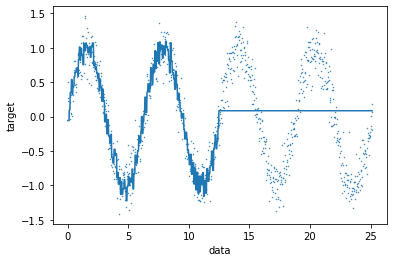

In [40]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, s=0.2)
ax.set_xlabel("data")
ax.set_ylabel("target")
plt.plot(x, mts.predict(x))

# we are forcing the model to extrapolate
# and as we can see from the plot below
# it has not truly understood the signal at all